In [52]:
import pandas as pd
df = pd.read_csv('./Joules_of_Siam_Data - Power_Generation_Classified_By_fuel_type_Monthly.csv')
df.head()

,Date,Hydro Electricity,Fuel Oil,Coal & Lignite,Natural Gas,Diesel,Imported,Renewable Energy,Total
0,2002-1,512.6,168.3,"1,623.40","5,689.20",8.2,190.3,71.8,"8,264.00"
1,2002-2,588.9,138,"1,552.00","5,683.20",8.3,149.2,68.3,"8,188.00"
2,2002-3,798,218.3,"1,775.30","6,674.40",5.0,146.5,69.6,"9,687.10"
3,2002-4,718.8,250.8,"1,772.50","6,399.20",3.4,163.5,70.3,"9,378.40"
4,2002-5,602.4,186.5,"1,536.40","7,023.40",15.5,221.7,68.7,"9,654.70"


In [53]:
df.drop(['Date'],axis=1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hydro Electricity  251 non-null    object 
 1   Fuel Oil           238 non-null    object 
 2   Coal & Lignite     251 non-null    object 
 3   Natural Gas        251 non-null    object 
 4   Diesel             251 non-null    float64
 5   Imported           251 non-null    object 
 6   Renewable Energy   251 non-null    object 
 7   Total              251 non-null    object 
dtypes: float64(1), object(7)
memory usage: 15.8+ KB


In [55]:
df.isnull().sum()

Hydro Electricity     0
Fuel Oil             13
Coal & Lignite        0
Natural Gas           0
Diesel                0
Imported              0
Renewable Energy      0
Total                 0
dtype: int64

In [56]:
df['Fuel Oil'].fillna(0,inplace=True)

In [57]:
df.isnull().sum()

Hydro Electricity    0
Fuel Oil             0
Coal & Lignite       0
Natural Gas          0
Diesel               0
Imported             0
Renewable Energy     0
Total                0
dtype: int64

In [58]:
df['Fuel Oil'].fillna(0,inplace=True)
df = df.replace(',','', regex=True).astype('float')

In [59]:
df.head()

,Hydro Electricity,Fuel Oil,Coal & Lignite,Natural Gas,Diesel,Imported,Renewable Energy,Total
0,512.6,168.3,1623.4,5689.2,8.2,190.3,71.8,8264.0
1,588.9,138.0,1552.0,5683.2,8.3,149.2,68.3,8188.0
2,798.0,218.3,1775.3,6674.4,5.0,146.5,69.6,9687.1
3,718.8,250.8,1772.5,6399.2,3.4,163.5,70.3,9378.4
4,602.4,186.5,1536.4,7023.4,15.5,221.7,68.7,9654.7


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hydro Electricity  251 non-null    float64
 1   Fuel Oil           251 non-null    float64
 2   Coal & Lignite     251 non-null    float64
 3   Natural Gas        251 non-null    float64
 4   Diesel             251 non-null    float64
 5   Imported           251 non-null    float64
 6   Renewable Energy   251 non-null    float64
 7   Total              251 non-null    float64
dtypes: float64(8)
memory usage: 15.8 KB


In [61]:
df.isnull().sum()

Hydro Electricity    0
Fuel Oil             0
Coal & Lignite       0
Natural Gas          0
Diesel               0
Imported             0
Renewable Energy     0
Total                0
dtype: int64

<AxesSubplot:>

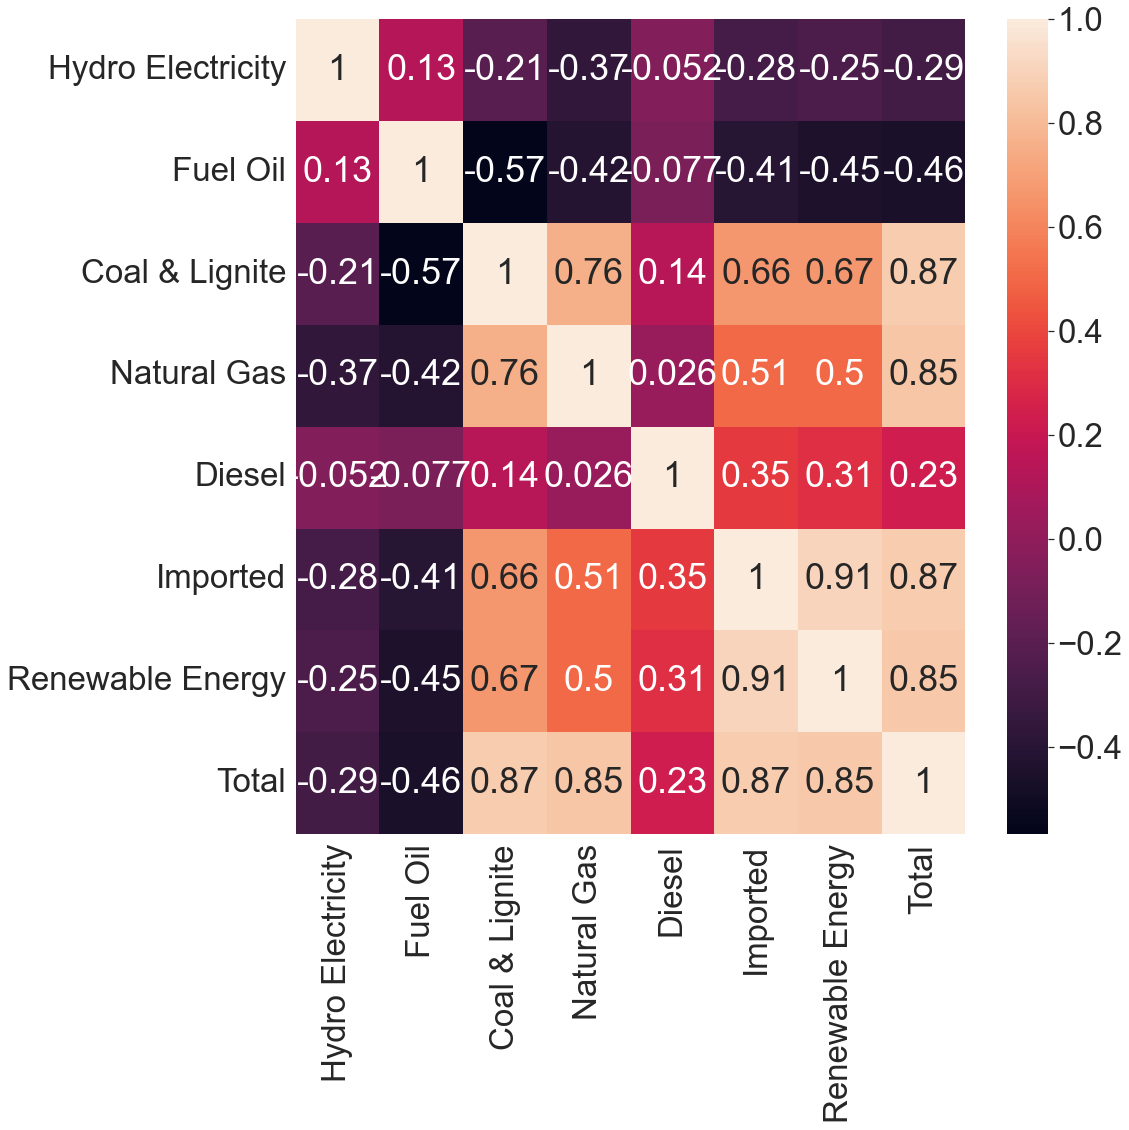

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
sns.set(font_scale=3)
sns.heatmap(df.corr(),annot=True)

In [63]:
from sklearn.preprocessing import StandardScaler

#2. create the object
sc = StandardScaler()

#3. fit and transform
standardized_data = sc.fit_transform(df.iloc[:,:-1])

In [64]:
from sklearn.model_selection import train_test_split
X = standardized_data
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=999)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 7), (101, 7), (150,), (101,))

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.999999998918025

In [67]:
yhat = lr.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

MSE  = mean_squared_error(y_test, yhat)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, yhat)

MSE, RMSE, MAE

(0.007814671460657945, 0.08840063043133767, 0.06409833863625242)

In [69]:
df.columns

Index(['Hydro Electricity', 'Fuel Oil', 'Coal & Lignite', 'Natural Gas',
       'Diesel', 'Imported', 'Renewable Energy', 'Total'],
      dtype='object')

<AxesSubplot:>

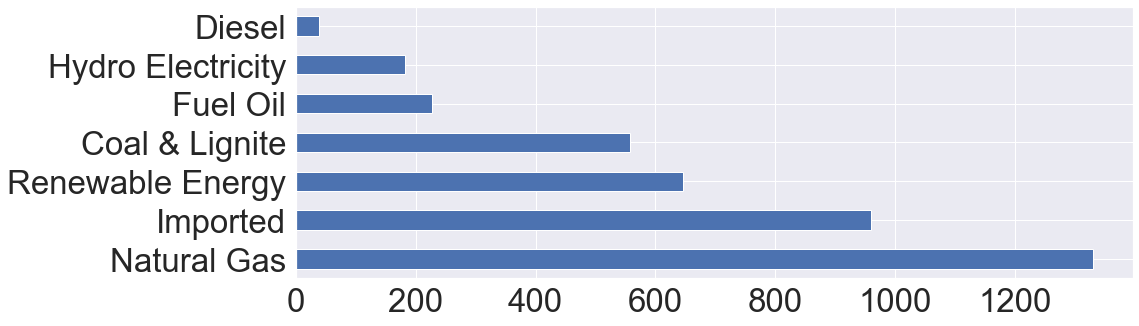

In [82]:
import seaborn as sns
plt.figure(figsize=(15, 5))
pd.Series(lr.coef_, index=['Hydro Electricity', 'Fuel Oil', 'Coal & Lignite', 'Natural Gas',
       'Diesel', 'Imported', 'Renewable Energy']).nlargest(7).plot(kind='barh')

# Appendix

In [71]:
import pandas as pd

# Example DataFrame
df = pd.DataFrame({'Year': [2019, 2020, 2021],
                   'Jan': [10, 20, 30],
                   'Feb': [15, 25, 35],
                   'Mar': [20, 30, 40]})

# Use melt function to transform the DataFrame
df_melted = df.melt(id_vars='Year', var_name='Month', value_name='Value')

# Output the melted DataFrame
print(df_melted)

   Year Month  Value
0  2019   Jan     10
1  2020   Jan     20
2  2021   Jan     30
3  2019   Feb     15
4  2020   Feb     25
5  2021   Feb     35
6  2019   Mar     20
7  2020   Mar     30
8  2021   Mar     40


In [72]:
import pandas as pd
df = pd.read_csv('./Joules_of_Siam_Data - FT_electricity_cost.csv')
df.drop(['Year','Average'],axis=1,inplace=True)
df.shape

(31, 12)

In [73]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1,1.39,-15.32,-11.60,-11.6,-15.9,-37.29,-4.80,58.96,59.0,52.04,...,0.00,56.32,50.71,42.40,18.28,18.10,7.50,6.91,8.39,0.00
2,1.39,-15.32,-11.60,-11.6,-15.9,-37.29,-4.80,58.96,59.0,52.04,...,24.44,56.32,50.71,42.40,18.28,18.10,7.50,6.91,8.39,0.00
3,1.39,-15.32,-11.60,-11.6,-15.9,-37.29,-4.80,58.96,59.0,52.04,...,24.44,56.32,50.71,42.40,26.73,18.10,14.85,3.56,8.39,0.00
4,1.39,-15.32,-11.60,-11.6,-15.9,-37.29,-4.80,58.96,59.0,52.04,...,24.44,61.52,32.61,50.45,26.73,22.87,14.85,0.36,5.32,0.00
5,24.77,-15.32,-11.60,-11.6,-15.9,-24.77,-33.29,49.61,69.0,46.92,...,24.44,61.52,32.61,50.45,26.73,22.87,14.85,9.53,5.32,0.00
6,24.77,-15.32,-11.60,-11.6,-15.9,-24.77,-33.29,49.61,69.0,46.92,...,27.13,61.52,32.61,50.45,26.73,22.50,17.35,2.80,5.32,0.00
7,24.77,-15.32,-11.60,-11.6,-15.9,-24.77,-33.29,49.61,69.0,46.92,...,27.13,61.52,32.61,50.45,26.73,25.82,24.70,2.80,3.24,0.00
8,24.77,-15.32,-11.60,-11.6,-15.9,-24.77,-33.29,49.61,69.0,46.92,...,27.13,64.52,37.92,55.77,26.73,25.82,19.95,-0.53,-1.86,0.00
9,93.43,-15.32,-12.43,-11.6,-15.9,-15.90,-33.29,46.38,69.0,54.00,...,27.13,64.52,37.92,55.77,26.73,25.82,23.82,7.50,-1.86,6.17
10,93.43,-15.32,-12.43,-11.6,-15.9,-15.90,-33.29,46.38,69.0,54.00,...,22.77,0.00,37.92,55.77,26.73,20.42,18.10,7.50,-1.86,6.17


In [74]:
df = df.stack().reset_index()

In [75]:
df.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [76]:
df.drop(['level_0'],axis=1,inplace=True)

In [77]:
df.rename(columns = {'level_1':'Date',0:'FT'}, inplace=True)

In [78]:
df.head()

,Date,FT
0,1,1.39
1,2,1.39
2,3,1.39
3,4,1.39
4,5,24.77


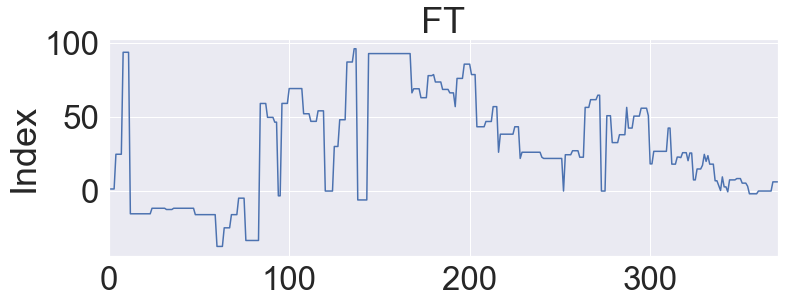

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title('FT')
plt.ylabel('Index')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['FT'])
plt.show()

In [80]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=64,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]
    
torch.manual_seed(101)
model = LSTMnetwork()
model

NameError: name 'nn' is not defined